<a href="https://colab.research.google.com/github/descandon88/math-for-machine-learning/blob/main/SVD_for_image_compression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A = U * ∑ * V 

A = Matriz original mxn, donde de m es igual a filas y n es igual a columnas (Prerequisito: m >= n ).

U= Matriz unitaria

∑ = Matriz diagonal rectangular de valores únicos (𝛔1, 𝛔2, 𝛔3... 𝛔n) donde 𝛔1 > 𝛔2>... 𝛔n.

V = Matriz Unitaria

Para k = 2
Donde k es el número de de singular values que nos gustaría utilizar para comprimir. 

In [4]:
# from IPython.core.display import Image
import numpy as np
from PIL  import Image


In [5]:
!cp /galadriel_img.jpg . 

cp: cannot stat '/galadriel_img.jpg': No such file or directory


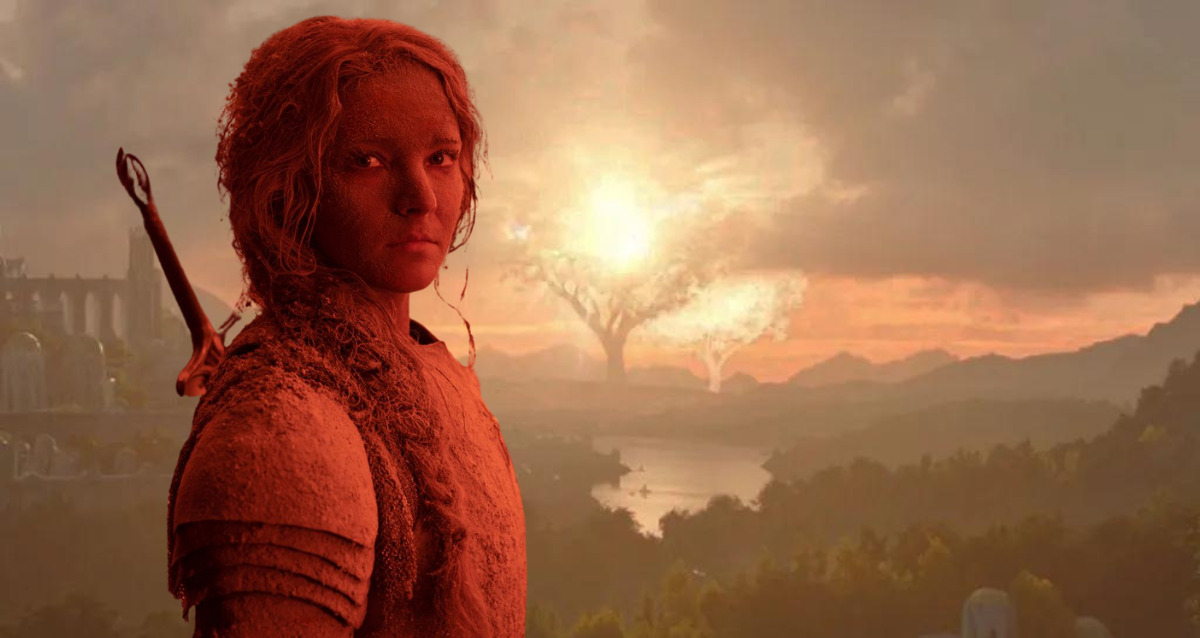

In [6]:
img=Image.open('galadriel_img.jpg')
imgtest=img.copy()
imgtest

In [7]:
img_array=np.array(img)
#img_array
img_array.shape
#img_array.shape[0]
#img_array.shape[1]



(638, 1200, 3)

In [8]:
## Ejemplo de shape e un arreglo de 2 matrices y mx n files x columnas
arr = np.array([[[1, 2, 3, 4, 5],
               [1, 4, 5, 14, 25],[41, 32, 23, 4, 5],[11, 32, 3, 24, 25]],
                [[1, 2, 3, 4, 5],
               [1, 4, 5, 14, 25],[41, 32, 23, 4, 5],[11, 32, 3, 24, 25]]])

print(arr.shape)

(2, 4, 5)


In [9]:
# Funcion que abre la imagen y retorna 3 matrices, cada una correspondiente a un channel 
# (R,G y B) 

def openImage(imOrig):
  #imOrig = Image.open(imagePatch)
  im=np.array(imOrig)
  aRed = im[:,:,0]
  aGreen =im[:,:,1]
  aBlue= im[:,:,2]
  return [aRed, aGreen, aBlue, imOrig]

In [10]:
def CompressionSingleChannel(channelDataMatrix, singularValuesLimit):
  uChannel, sChannel, vhChannel = np.linalg.svd(channelDataMatrix)
  aChannelCompressed = np.zeros((channelDataMatrix.shape[0],channelDataMatrix.shape[1]))
  k = singularValuesLimit
  leftSide = np.matmul(uChannel[:,0:k],np.diag(sChannel)[0:k,0:k])
  aChannelCompressedInner = np.matmul(leftSide,vhChannel[0:k,:])
  aChannelCompressed = aChannelCompressedInner.astype('uint8')
  return aChannelCompressed

In [11]:

aRed, aGreen, aBlue, OriginalImage = openImage(imgtest)

singularValuesLimit = 330
aRedCompressed = CompressionSingleChannel(aRed,singularValuesLimit)
aGreenCompressed = CompressionSingleChannel(aGreen,singularValuesLimit)
aBlueCompressed = CompressionSingleChannel(aBlue,singularValuesLimit)



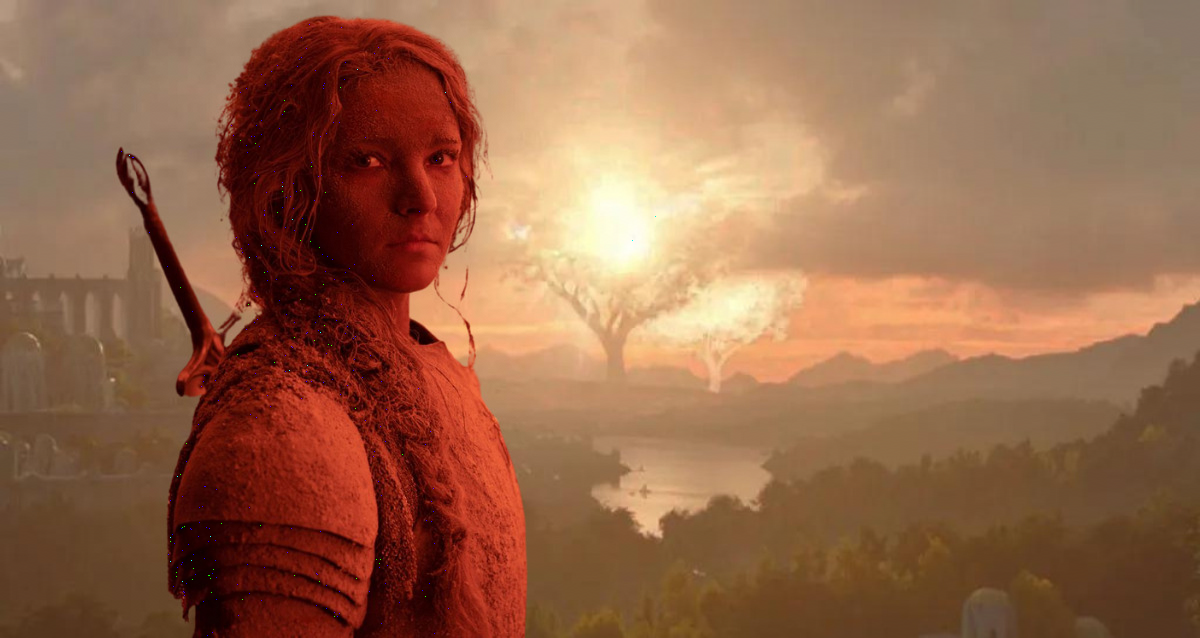

In [12]:
imr = Image.fromarray(aRedCompressed, mode=None)
img = Image.fromarray(aGreenCompressed,mode=None)
imb = Image.fromarray(aBlueCompressed,mode=None)

newImage = Image.merge("RGB", (imr, img, imb))


newImage


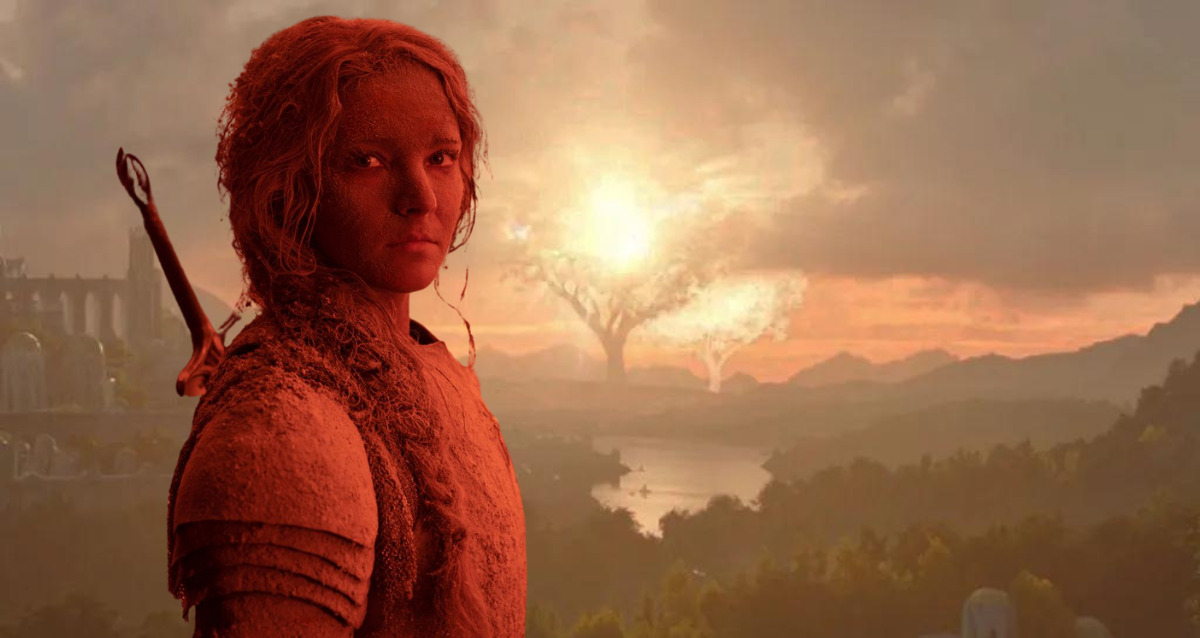

In [13]:
OriginalImage

In [14]:
#Calculate de Compression Ratio
imageHeight = 638
imageWidth = 1200
mr= imageHeight
mc =imageWidth

originalSize = mr*mc*3
compressedSize = singularValuesLimit * (1+mr+mc)*3
print('Tamaño original:')
print(originalSize)

print('Tamaño comprimido:')
print(compressedSize)

print('ratio compressed size / original size:')
ratio = compressedSize *1.0 / originalSize
print(ratio)
print('Se comprimisió la imagen al '+str(round(ratio*100,2))+'% del tamaño original')

Tamaño original:
2296800
Tamaño comprimido:
1820610
ratio compressed size / original size:
0.7926724137931035
Se comprimisió la imagen al 79.27% del tamaño original
